Laboratorio 2 - Autos.ipynb

En este laboratorio se presentará el análisis y resultados obtenidos al usar la base de datos de MPG. Los objetivos del análisis son, en primer lugar, obtener un modelo de regresión con un r2 superior al 88% utilizando una entrada o varias, y en segundo lugar, seleccionar 5 vehículos a elección y obtener una regresión por cada uno de ellos, buscando el mejor rendimiento posible y comparando visualmente las respuestas de todas las regresiones usando un gráfico de línea o dispersión.

In [5]:
### paquetes de impotacion y manejo de datos
import pandas as pd
import numpy as np
import random
# ### paquetes de graficos
import matplotlib.pyplot as plot
# from scipy import stats

# ######  paquetes de analitica de datos
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

archivo='auto-mpgv2.csv'

pepito=pd.read_csv(archivo)
Nombre_columnas=['mpg', 
'cylinders',
'displacement',
'horsepower',
'weight' ,
'acceleration', 
'model year', 
'origin',
'car name',]
pepito.columns=Nombre_columnas

# plot.hist(x=pepito['horsepower'])
# plot.subplots()
# plot.hist(x=pepito['acceleration'])
# plot.boxplot(x=pepito['Viscera weight'])
# plot.subplots()



Para empezar, el conjunto de datos original contiene 398 registros de vehículos, donde se registran diversas características como el número de cilindros, la cilindrada, la potencia, el peso, la aceleración, el año de fabricación, el origen y la millas por galón (MPG).

Despues de esto se analizaron los datos para detectar posibles datos atipicos, los cuales fueron eliminados del conjunto de datos, y de los cuales quedaron en total de 392 registros.

Estos datos atipicos se hallaron en la columna de HorsePower donde se encontraron caracteres que no coincidian con la informacion suministrada en la base de datos, por lo que se procedio a eliminarlos. 

Además se procedió a guardar la posicion exacta de estos datos atipicos para poder eliminarlos del conjunto de datos original.

In [8]:
# Deben identificar el lugar exacto de estos atípicos y guardar sus índices en una variable externa. 
indices_atipicos = pepito.loc[pepito.eq('?').any(axis=1)].index

indices_atipicos

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

Se pudieron detectar 6 datos atipicos en la columna de HorsePower, los cuales fueron eliminados del conjunto de datos original. Además las posiciones en el index de las filas de estos datos atipicos son las siguientes:

32, 126, 330, 336, 354, 374

In [9]:
#Limpiar datos

pepito = pepito[pepito.horsepower != '?']
pepito

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Luego de guardar dichas posiciones, se procedió a eliminar los datos atipicos del conjunto de datos original. Porque como tal no es posible realizar su tratamiento de datos atipicos, ya que no se cuenta con la informacion necesaria para poder realizarlo.

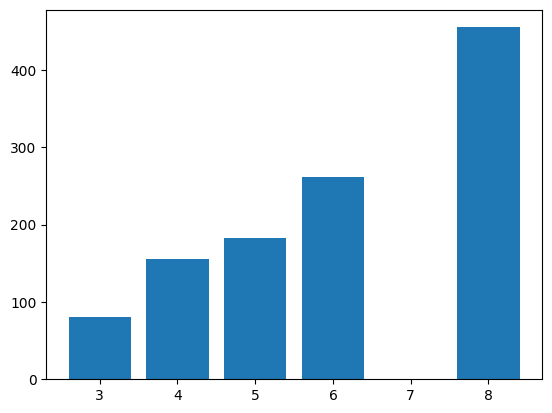

In [10]:
plot.bar(pepito['cylinders'],pepito['displacement'])

X=pepito['cylinders']
Y=pepito['displacement']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size   = 0.6,
                                    )

Se utilizó la información de las columnas de "cylinders" y "displacement" para crear un gráfico de barras donde se representa el número de cilindros de los carros en el eje X y la cilindrada en el eje Y. Esto se hizo para ver la relación entre estas dos variables. Al analizar los datos, se encontró que existe una correlación entre el número de cilindros y la cilindrada del motor, además de que lo que se obsera es que a medida que aumenta el número de cilindros, también aumenta la cilindrada del motor. Esto puede deberse a que se requiere más espacio para alojar un mayor número de cilindros y, por lo tanto, también se requiere una mayor cilindrada para que el motor funcione correctamente, esto debido a que la cilindrada representa el volumen de las camaras de combustión del motor.

In [15]:
modelo = LinearRegression()
modelo.fit(X = np.array(X_train).reshape(-1,1), y = y_train)
predicciones = modelo.predict(X = np.array(X_test).reshape(-1,1))

predicciones = modelo.predict(X = np.array(X_test).reshape(-1,1))
r2 = r2_score(y_true = y_test, y_pred = predicciones)
print('El valor valor de r2 es: ', r2)

El valor valor de r2 es:  0.8937998768497225


Para realizar la regresión lineal se dividió el conjunto de datos en dos, uno de entrenamiento y otro de prueba, utilizando el 60% del conjunto de datos para entrenamiento y el 40% restante para pruebas. Esto se hizo con el objetivo de evaluar el rendimiento del modelo de regresión lineal en datos que no habían sido utilizados en el entrenamiento del modelo.

Para evaluar el rendimiento del modelo de regresión lineal, se utilizó R^2. En este caso, el valor de R^2 obtenido fue de 0.8937998768497225, lo que indica que el modelo da como resultado aproximadamente el 89.38% de la variabilidad observada en los datos. Esto quiere decir que el modelo de regresión lineal es un buen modelo para predecir el rendimiento de los vehículos en MPG y ademas supera el 88% de rendimiento requerido.

In [134]:

# Cuantificar la cantidad de registros que existen por vehículo
frecuencia_marcas = pepito['car name'].str.split(' ', expand=True)[0].value_counts()

frecuencia_marcas

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
opel              4
saab              4
subaru            4
chevy             3
renault           3
maxda             2
cadillac          2
bmw               2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: 0, dtype: int64

Ahora se cuantifican las marcas de los vehiculos, esto es para saber con exactitud el numero de carros por marca que hay en el conjunto de datos.

A partir de este momento se comparan 5 vehiculos a eleccion, para esto se seleccionan 5 marcas de vehiculos y se crea un nuevo conjunto de datos con los datos de estos 5 vehiculos.
De esta manera nos permite analizar el rendimiento de estos 5 vehiculos de manera individual. Esto se hace mediante los caballos de fuerza de cada vehiculo y su rendimiento en MPG. Así podremos ver la relación entre estos dos parametros. En la cual encontramos que a medida que aumenta la potencia del vehiculo, tambien disminuye su rendimiento en MPG. Esto se debe a que a mayor potencia, el vehiculo consume mas combustible para poder moverse.

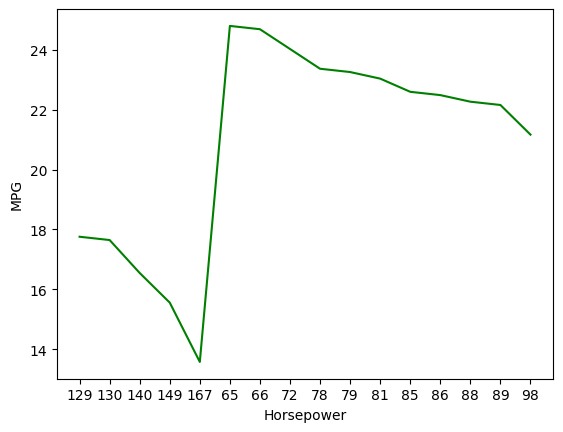

R^2 score: 0.45887737921224236
MSE: 22.001359963464296


In [137]:
'''2. Seleccionando 5 vehículos a elección obtener una regresión por cada uno de ellos, 
buscando el mejor rendimiento posible. Además:
a. Comparar visualmente las respuestas de todas las regresiones usando un 
gráfico de línea o dispersión.'''

# Vehiculos Ford

# Filtrar vehículos de una marca específica
ford_cars = pepito[pepito['car name'].str.startswith('ford')]


# Regresión lineal y gráfico
# Regresión lineal y gráfico
X = ford_cars['horsepower']
Y = ford_cars['mpg']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size=0.5,
                                        random_state=0
                                    )

modelo = LinearRegression()
modelo.fit(X=np.array(X_train).reshape(-1,1), y=y_train)

y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

# Ordenar los valores según el horsepower
values = sorted(zip(X_test, y_pred))

X_test_sorted, y_pred_sorted = zip(*values)

# Graficar los valores ordenados
plot.plot(X_test_sorted, y_pred_sorted, color='green')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MSE:", mse)


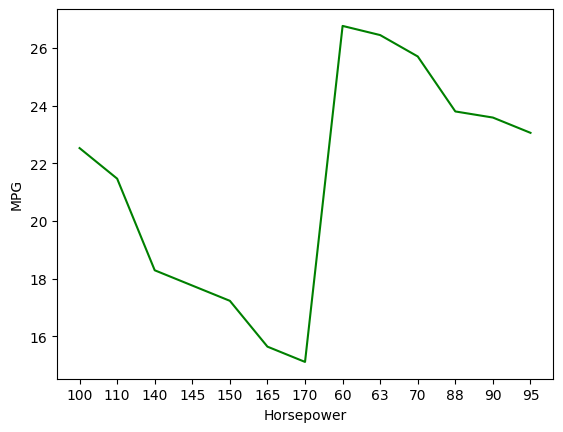

R^2 score: 0.5543958704975914
MSE: 16.78377160467712


In [138]:
# Vehiculos Chevrolet

# Filtrar vehículos de una marca específica
ford_cars = pepito[pepito['car name'].str.startswith('chevrolet')]


# Regresión lineal y gráfico
# Regresión lineal y gráfico
X = ford_cars['horsepower']
Y = ford_cars['mpg']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size=0.5,
                                        random_state=0
                                    )

modelo = LinearRegression()
modelo.fit(X=np.array(X_train).reshape(-1,1), y=y_train)

y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

# Ordenar los valores según el horsepower
values = sorted(zip(X_test, y_pred))

X_test_sorted, y_pred_sorted = zip(*values)

# Graficar los valores ordenados
plot.plot(X_test_sorted, y_pred_sorted, color='green')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MSE:", mse)


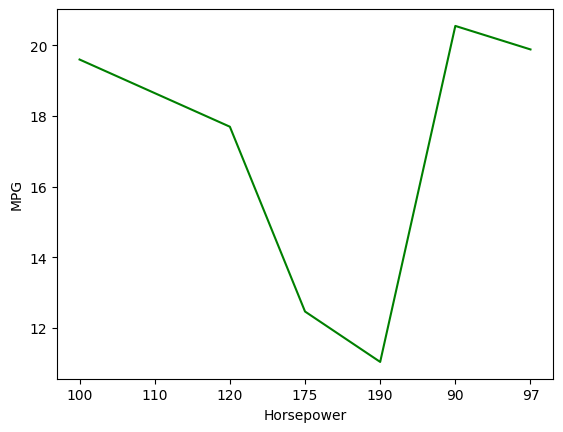

R^2 score: 0.4434421310373803
MSE: 4.890326336364407


In [139]:
# Vehiculos amc

# Filtrar vehículos de una marca específica
ford_cars = pepito[pepito['car name'].str.startswith('amc')]


# Regresión lineal y gráfico
# Regresión lineal y gráfico
X = ford_cars['horsepower']
Y = ford_cars['mpg']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size=0.5,
                                        random_state=0
                                    )

modelo = LinearRegression()
modelo.fit(X=np.array(X_train).reshape(-1,1), y=y_train)

y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

# Ordenar los valores según el horsepower
values = sorted(zip(X_test, y_pred))

X_test_sorted, y_pred_sorted = zip(*values)

# Graficar los valores ordenados
plot.plot(X_test_sorted, y_pred_sorted, color='green')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MSE:", mse)


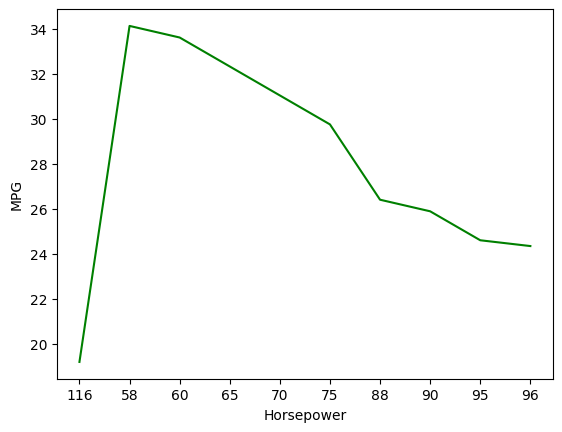

R^2 score: 0.36553354759941037
MSE: 18.059017609364243


In [140]:
# Vehiculos toyota

# Filtrar vehículos de una marca específica
ford_cars = pepito[pepito['car name'].str.startswith('toyota')]


# Regresión lineal y gráfico
# Regresión lineal y gráfico
X = ford_cars['horsepower']
Y = ford_cars['mpg']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size=0.5,
                                        random_state=0
                                    )

modelo = LinearRegression()
modelo.fit(X=np.array(X_train).reshape(-1,1), y=y_train)

y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

# Ordenar los valores según el horsepower
values = sorted(zip(X_test, y_pred))

X_test_sorted, y_pred_sorted = zip(*values)

# Graficar los valores ordenados
plot.plot(X_test_sorted, y_pred_sorted, color='green')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MSE:", mse)


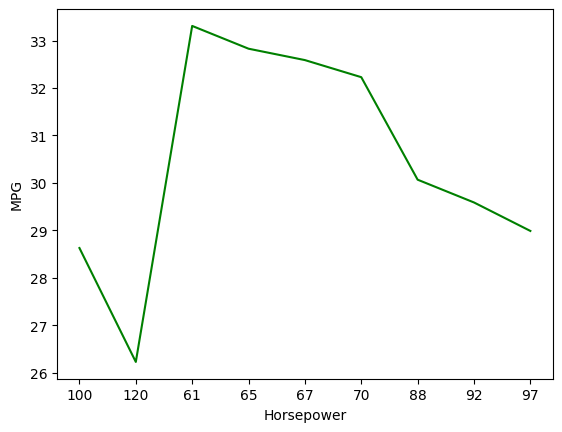

R^2 score: 0.30621013131215435
MSE: 25.71358700824327


In [17]:
       
# Vehiculos volkswagen

# Filtrar vehículos de una marca específica
ford_cars = pepito[pepito['car name'].str.startswith('datsun')]


# Regresión lineal y gráfico
# Regresión lineal y gráfico
X = ford_cars['horsepower']
Y = ford_cars['mpg']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size=0.5,
                                        random_state=0
                                    )

modelo = LinearRegression()
modelo.fit(X=np.array(X_train).reshape(-1,1), y=y_train)

y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

# Ordenar los valores según el horsepower
values = sorted(zip(X_test, y_pred))

X_test_sorted, y_pred_sorted = zip(*values)

# Graficar los valores ordenados
plot.plot(X_test_sorted, y_pred_sorted, color='green')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MSE:", mse)


Para realizar un análisis de las marcas de vehículos, se seleccionaron cinco marcas específicas: Ford, Chevrolet, Amc, Toyota y Datson. Al estudiar los datos de estos vehículos, se observa una tendencia en común: a medida que la potencia de los caballos de fuerza aumenta, el rendimiento en millas por galón (MPG) disminuye.

Esto significa que cuanto más potencia tenga el motor del vehículo, menos millas podrá recorrer con la misma cantidad de combustible. Es importante tener en cuenta que este patrón se observa en todas las marcas de vehículos seleccionadas, lo que indica que la relación entre la potencia y el rendimiento en MPG puede ser un factor importante en la elección del vehículo adecuado.

Cabe resaltar que al usar mas potencia de los vehiculos se consume mas gasolina y por lo tanto su rendimiento en MPG disminuye debido a que podrá recorrer menos millas.

Además, al evaluar el R2, se encontró que el modelo de regresión lineal funciona mejor en algunos casos que en otros. En particular el valor de R2 para Ford es del 45,88%, lo que indica que el modelo tiene una capidad del 45,88% de la variabilidad en los datos. Para Chevrolet, el valor de R2 es del 55,43%, lo que indica que el modelo tiene una capidad  del 55,43% de la variabilidad. Para Amc, el valor de R2 es del 44,34%, mientras que para Toyota es del 36,55% y para Datsun es del 30,62%.

Esto quiere decir que el modelo de regresión lineal funciona mejor para predecir el consumo de combustible en vehículos de las marcas Chevrolet y Ford, mientras que es menos efectivo para predecir el consumo en vehículos de las marcas Toyota, Amc y Datson. Todo esto va relacionado con los datos proporcionados en la base de datos, y cabe destacar que estos resultados pudieron haberse afectado porque la cantidad de vehiculos ford y chevrolet son mayor que la de las demas marcas, por lo tanto puede llegar a funcionar mejor al tener mas datos para entrenar el modelo.

En conclusión, luego de realizar un análisis de la base de datos se identificaron algunos datos atípicos y se aplicaron técnicas de limpieza para mejorar la calidad de los datos.

Se realizó un modelo de regresión lineal utilizando diversas variables de entrada, con un conjunto de entrenamiento del 60% y un conjunto de prueba del 40%, obteniendo un valor de R2 de 0.89. Esto indica que el modelo es capaz del 89% de la variabilidad en los datos.

Ademas, se seleccionaron cinco marcas de vehículos (Ford, Chevrolet, Amc, Toyota y Datson) para realizar el análisis de regresión específicos. Se observó que la relación entre la potencia de caballos de fuerza y el rendimiento de combustible es muy fuerte, y se obtuvieron diferentes valores de R2 para cada una de ellas. Se puede concluir que la potencia de caballos de fuerza es importante para considerar y predecir el rendimiento de combustible de un vehículo.